Universität Basel | FS2024 <br>
Übung: *Grand Tour gone digital. Computergestützte Analyse frühneuzeitlicher Reiseberichte* <br>
Leitung: Ina Serif
### Projektarbeit: Quantitative Textanalyse
Stefan Heinen | Nora Holländer | Anna Scognamiglio <br> <br>
Programmiert mit Python 3.12.2
> https://docs.python.org/release/3.12.2/

Zur Präsentation verwenden wir Jupyter Notebook, Version 7.2.2:
> https://docs.jupyter.org/en/latest/

In [ ]:
# At this point, we would assume that you have set up Python and Jupyter Notebook sucessfully. 
# The remaining dependencies can be installed with the command below.
# If you have already installed all dependencies (-> see 'requirements.txt') via command line , this step can be skipped.
import sys
!{sys.executable} -m pip install -r requirements_text_analysis.txt

## 1. Reiseberichte von Philipp Hainhofer
Der Datensatz für diese Untersuchung besteht aus 11 edierten Reiseberichten von Philipp Hainhofer (1578–1647), siehe: <br>
> Philipp Hainhofer: Reiseberichte und Sammlungsbeschreibungen 1594–1636. Edition und Datensammlung zur Kunst- und Kulturgeschichte der ersten Hälfte des 17. Jahrhunderts [Wolfenbütteler Digitale Editionen, Nr. 4], hrsg. und eingeleitet von Michael Wenzel, Transkription und Kommentar von Ursula Timann und Michael Wenzel, Wolfenbüttel: Herzog August Bibliothek 2020ff.

Diese werden als TXT-Dateien auf der Webseite des Projektes zum Download bereitgestellt und sind bereits in einer Form aufbereitet, die sich für eine quantitative Textanalyse eignet. Für Informationen zu den Dateien, siehe:
> https://hainhofer.hab.de/informationen-zur-edition/downloads

Downloadlink unter:
> https://hainhofer.hab.de/cms/uploads/hainhofer-txt.zip

### 1.1 Zusammenstellen des Korpus
#### 1.1.1 Herunterladen und entpacken der Dateien

In [ ]:
# download zip-file:
import os  # module to interact with the operating system
from retrieve_data import get_source_material  # this function uses the 'requests' library to interact with web resources

# get current working directory:
w_dir = os.getcwd()
# set directory to store downloaded files:
download_dir = os.path.join(w_dir, 'data')
# if non-existent, create a new directory:
os.makedirs(download_dir, exist_ok=True)
# define path for file download:
download_path = os.path.join(download_dir, 'hainhofer_txt.zip')
# set url:
url = 'https://hainhofer.hab.de/cms/uploads/hainhofer-txt.zip'
# retrieve data from url:
get_source_material(source_url=url,
                    file_path=download_path,
                    file_format='zip')

In [6]:
# unpack data to seperate folder:
from zipfile import ZipFile

data_dir = os.path.join('data', 'text_data', 'hainhofer_reiseberichte')
os.makedirs(data_dir, exist_ok=True)

with ZipFile(download_path) as z_object:
    z_object.extractall(path=data_dir)

In [ ]:
# check content of directory:
import os
sorted(os.listdir(data_dir))

#### 1.1.2 Zusammenführen des Korpus in einer CSV-Datei
Damit die einzelnen Texte des Korpus bei der Analyse nicht jeweils einzeln geladen werden müssen, werden sie in tabellarischer Form gebündelt. Eine Zeile entspricht jeweils einem Text; die Spalte "text" enthält also pro Zeile den ganzen Text als _string_ (= "Zeichenkette"). Pro Text werden weitere Spalten mit zusätzlichen Informationen hinzugefügt (Jahr der Reise, Ziel der Reise), sowie ein Kürzel das den jeweiligen Text unmissverständlich identifiziert ("text_id"). Dies bietet zusätzlich die Möglichkeit, das Korpus später in Unterkategorien zu unterteilen (z.B. nach Jahr der Entstehung, Ziel der Reise der einzelnen Texte) und eröffnet so weitere Vergleichsmöglichkeiten.

In [ ]:
from create_dataset_functions import get_text_corpus, to_csv  # to bundle the corpus and additional information in tabular form

w_dir = os.getcwd()
source_dir = os.path.join(w_dir, 'data', 'text_data', 'hainhofer_reiseberichte')
# Get plain text and text identifiers of the source material, stored in a list:
text_collection, text_ids = get_text_corpus(source_dir, corpus_encoding='utf-16')

# Add additional information:
years = [1611, 1603, 1611, 1612, 1613, 1636, 1613,
         1614, 1612, 1613, 1615
         ]

destinations = ['eichstaett', 'muenchen', 'muenchen',
                'muenchen', 'muenchen', 'muenchen',
                'neuburg', 'neuburg', 'nuernberg',
                'regensburg', 'durlach'
                ]

# Collect data in a dictionary:
hainhofer_dict = {'text': text_collection, 'year': years,
                  'destination': destinations, 'text_id': text_ids}

# Save as csv-file
to_csv(corpus_dict=hainhofer_dict, target_path=os.path.join(w_dir, 'data', 'korpus_hainhofer.csv'))

### 1.2 Daten einlesen
Das Korpus wird in tabellarischer Form geladen, um den direkten Zugriff des Programms auf den Textinhalt zu vereinfachen. 
Eine Zeile repräsentiert jeweils einen Text des gesamten Korpus, in der Spalte "text" ist der korrespondierende Textinhalt als string ("Zeichenkette") enthalten. <br>
Wir verwenden dafür das python package _Pandas_, version 2.2.2:
> The pandas development team. (2024). pandas-dev/pandas: Pandas (v2.2.2). Zenodo. https://doi.org/10.5281/zenodo.10957263

In [1]:
import os
import pandas as pd  # for tabular data

# Define path to data source:
w_dir = os.getcwd()
source = os.path.join(w_dir, 'data', 'korpus_hainhofer.csv')

# Load data as Data Frame:
hainhofer_df = pd.read_csv(source)
hainhofer_df.index = hainhofer_df.text_id

hainhofer_df

,text,year,destination,text_id
text_id,,,,
eichstätt_1611,PHILIPPI HAINHOFERI Burgers zu Augspurg. RELAT...,1611,eichstaett,eichstätt_1611
münchen_1603,Adj 13. Julij. 1603 mit meim schwager Daniel R...,1603,muenchen,münchen_1603
münchen_1611,"p. 4238.1.\nRELATIO. Vber PHILIPPI Hainhofers,...",1611,muenchen,münchen_1611
münchen_1612,p. 4410.6.\nKurtze Relation. Mein Philippi Hai...,1612,muenchen,münchen_1612
münchen_1613,"RELATIO, Philippj Hainhofers Raÿs. Zue Herrn P...",1613,muenchen,münchen_1613
münchen_1636,"RELATIO PHILIPPI HAINHOFERI, PATRICII AUGVSTAN...",1636,muenchen,münchen_1636
neuburg_1613,p. 42 38.2\nRELATIO. Vber Philippj Hainhofers ...,1613,neuburg,neuburg_1613
neuburg_1614,Fürstliche Pommerische INSTRVCTION. Vnd Philip...,1614,neuburg,neuburg_1614
nürnberg_1612,"RELATIO Vber PHILIPPI Hainhofers, Burgers zu A...",1612,nuernberg,nürnberg_1612


### 1.3 Wörter zählen
Die Kalkulation der absoluten Worthäufigkeiten dient einem ersten Überblick. Wir haben dazu eine Funktion geschrieben, die das
Vorkommen der einzelnen Wörter im Text zählt und eine Tabelle ausgibt. Vorgängig wird der Text in die einzelnen Wörter (Tokens) zerlegt,
wozu wir den Tokenizer von NLTK (_Natural Language Toolkit_), Version 3.9.1 verwenden:
>https://www.nltk.org/

> Bird, Steven, Edward Loper and Ewan Klein (2009). Natural Language Processing with Python. O’Reilly Media Inc.

In [3]:
import nltk
nltk.download('punkt_tab')
from word_count_functions import get_frequency_df  # to count absolute frequency of words

# get content from 'text' column
all_text = hainhofer_df.text.to_list()

# join into one string:
text_joined = ' '.join(all_text)

# get frequency table:    
frequencies = get_frequency_df(text_joined)

# display most frequent terms:
display(frequencies.sort_values(by='frequency', ascending=False).head(10))

,word,frequency
72,vnd,8677
94,der,3581
8,in,3543
3,zu,3247
74,die,3030
84,mit,1947
130,von,1817
163,das,1746
77,den,1592
172,auch,1562


Wie zu erwarten war, sind Präpositionen, Konjunktionen und Artikel über das ganze Korpus gerechnet am häufigsten
vertreten (dies würde auch für die einzelnen Texte im Korpus gelten). Isoliert betrachtet sagen diese wenig über den Inhalt der Texte aus.
Um mit der Analyse in dieser Form weiterzufahren, kann entweder eine Liste von Wörtern definiert werden, die nicht in die quantitative Analyse
miteinbezogen werden sollen (sogenannte "stop words"), oder die Worthäufigkeiten können mit einer statistischen Methode gewichtet werden.

### 1.4 Tf-idf-Werte berechnen und visualizieren
Das Tf-idf-Mass (_term frequency, inverse document frequency_) ist ein statistischer Wert, mittels welchem die Relevanz einzelner Wörter für einen Text in einer Textsammlung bestimmt werden kann. Dabei wird die Worthäufigkeit innerhalb eines Textes gegen die Worthäufigkeit innerhalb der Textsammlung gewichtet. Ein Wort, das in einem Text häufig vorkommt, aber über die ganze Textsammlung weniger, erhält einen höheren Wert. <br>
Wir benutzen den tf-idf-vectorizer von scikit-learn, Version 1.5.1:
> https://scikit-learn.org/stable/

> Pedregosa et al. (2011). Scikit-learn: Machine Learning in Python, JMLR 12, pp. 2825-2830.

Für die Visualisierung der Ergebnisse benutzen wir das package matplotlib, Version 3.9.2:
> https://matplotlib.org/stable/index.html

> The Matplotlib Development Team (2024), Matplotlib: Visualization with Python (v3.9.2), Zenodo, https://doi.org/10.5281/zenodo.13308876.

> J. D. Hunter (2007), "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.


In [11]:
from tf_idf_functions import get_tf_idf_tables  # calculates tf-idf-values for every term per text in the corpus

# Create directory if it doesn't exist with a folder "figures" to store all the figures
figures_dir = os.path.join(w_dir, 'figures')
os.makedirs(figures_dir, exist_ok=True)

# get content from 'text' column
all_text = hainhofer_df.text.to_list()
# get text ids from data frame:
ids = hainhofer_df.text_id.to_list()

# this returns a dictionary with document names as keys, corresponding data frames as values:
hainhofer_tfidf = get_tf_idf_tables(text_collection=all_text, 
                                    doc_names=ids, 
                                    to_dict=True)

# prepare data for plotting:
data_frames = list(hainhofer_tfidf.values())
doc_names = list(hainhofer_tfidf.keys())

sorted_frames = [df.sort_values(by='tf_idf_score', 
                                ascending=False
                               ).head(10).sort_values(by='tf_idf_score'
                                                     ) for df in data_frames]

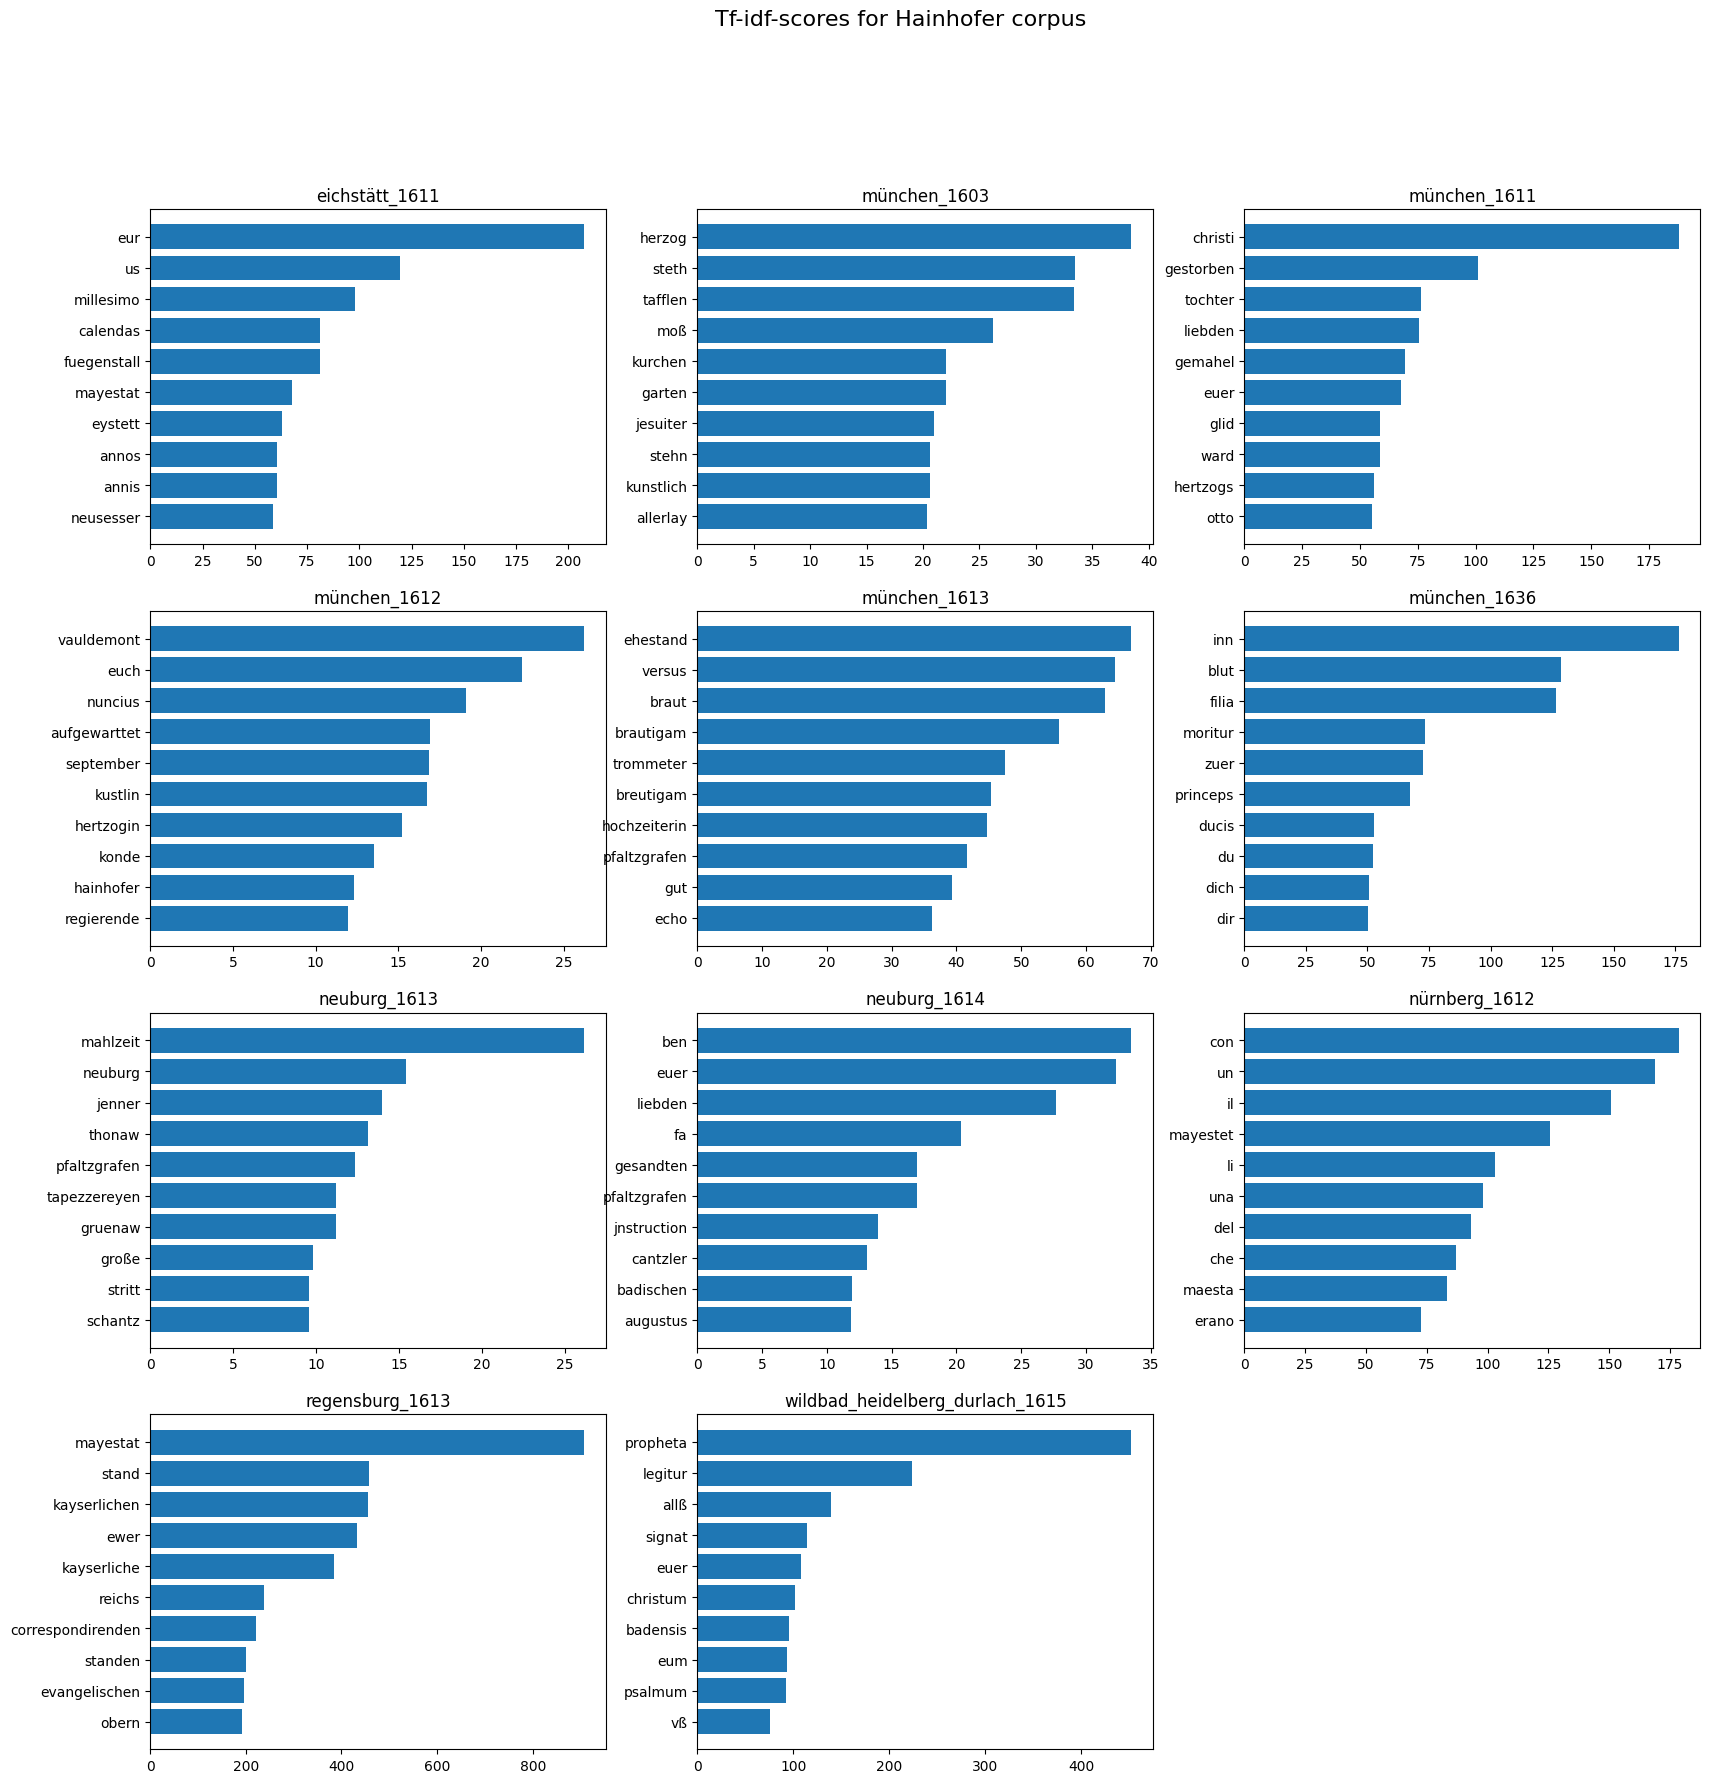

In [12]:
from matplotlib import pyplot as plt  # for visualizing the data

# plot data
nrows = 4
ncols = 3
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 20))
count = 0
for x in range(nrows):
    for y in range(ncols):
        try:
            df = sorted_frames[count]
            title = doc_names[count]
        except IndexError:
            break
        ax[x, y].barh(df.word, df.tf_idf_score)
        ax[x, y].set_title(title)
        count += 1
# remove empty subplot:        
fig.delaxes(ax[nrows-1, ncols-1])
plt.suptitle('Tf-idf-scores for Hainhofer corpus', fontsize=16)
# saving the figure to the "figures" folder
plt.savefig(os.path.join(figures_dir, 'tf_idf_scores_hainhofer.png'))  
plt.show()

Man scheint hier auf die Schnelle schon ein Gefühl davon zu bekommen, was die einzelnen Texte auszeichnet, bzw. wovon sie handeln könnten. Schwierigkeiten ergeben sich dort, wo Hainhofer lateinische ('wildbad_heidelberg_durlach_1615') oder italienische ('nürnberg_1612') Textpassagen einbaut, die entsprechend höher ins Gewicht fallen.

## 2. Wir erweitern das Korpus um weitere Textsammlungen 
Als Quelle dienen drei edierte Reiseberichte aus den Jahren 1666, 1780 und 1795, die im Deutschen Textarchiv (DTA) in digitalisierter Form vorliegen.
> Neitzschitz, Georg Christoph von: Sieben-Jährige und gefährliche WeltBeschauung Durch die vornehmsten Drey Theil der Welt Europa/ Asia und Africa. Bautzen, 1666. In: Deutsches Textarchiv, https://www.deutschestextarchiv.de/neitschitz_reise_1666, abgerufen am 19.07.2024, URN: urn:nbn:de:kobv:b4-20878-1.

> Sulzer, Johann Georg: Tagebuch einer von Berlin nach den mittäglichen Ländern von Europa in den Jahren 1775 und 1776 gethanen Reise und Rückreise. Leipzig, 1780. In: Deutsches Textarchiv, https://www.deutschestextarchiv.de/sulzer_reise_1780, abgerufen am 19.07.2024, URN: urn:nbn:de:kobv:b4-25231-5.

> Schulz, Friedrich: Reise eines Liefländers. 3 Bde. Berlin, 1795.
>
> - Bd. 1, H. 1: https://www.deutschestextarchiv.de/schulz_reise0101_1795, abgerufen am 19.07.2024, URN: urn:nbn:de:kobv:b4-200905197358.
> - Bd. 1, H. 2: https://www.deutschestextarchiv.de/schulz_reise0102_1795, abgerufen am 19.07.2024, URN: urn:nbn:de:kobv:b4-17297-4.
> - Bd. 2, H. 3: https://www.deutschestextarchiv.de/schulz_reise0201_1795, abgerufen am 19.07.2024, URN: urn:nbn:de:kobv:b4-200905197368.
> - Bd. 2, H. 4: https://www.deutschestextarchiv.de/schulz_reise0202_1795, abgerufen am 19.07.2024, URN: urn:nbn:de:kobv:b4-17298-9.
> - Bd. 3, H. 4 u. 5: https://www.deutschestextarchiv.de/schulz_reise03_1795, abgerufen am 19.07.2024, URN: urn:nbn:de:kobv:b4-200905197374.

In [ ]:
import os
from retrieve_data import get_source_material

# download source material
url_neitschitz = "https://www.deutschestextarchiv.de/book/download_txt/neitschitz_reise_1666"
url_sulzer = "https://www.deutschestextarchiv.de/book/download_txt/sulzer_reise_1780"
urls_schulz = ["https://www.deutschestextarchiv.de/book/download_txt/schulz_reise0101_1795",
               "https://www.deutschestextarchiv.de/book/download_txt/schulz_reise0102_1795",
               "https://www.deutschestextarchiv.de/book/download_txt/schulz_reise0201_1795",
               "https://www.deutschestextarchiv.de/book/download_txt/schulz_reise0202_1795",
               "https://www.deutschestextarchiv.de/book/download_txt/schulz_reise03_1795"]

w_dir = os.getcwd()
text_dir = os.path.join(w_dir, 'data', 'text_data')
# Neitschitz:
path_ne = os.path.join(text_dir, 'neitschitz_reise_1666.txt')
get_source_material(source_url=url_neitschitz,
                    file_path=path_ne,
                    file_format='txt')

# Sulzer
path_su = os.path.join(text_dir, 'sulzer_reise_1780.txt')
get_source_material(url_sulzer, path_su, 'txt')

# Schulz
dir_schulz = os.path.join(text_dir, 'schulz_1795')
os.makedirs(dir_schulz, exist_ok=True)
for num, url in enumerate(urls_schulz):
    path = os.path.join(dir_schulz, 'schulz_reise_1795_0' + str(num+1) + '.txt')
    #urlretrieve(url, path)
    get_source_material(url, path, 'txt')

Um einen sinnvollen Vergleich der Texte zu ermöglichen, müssen diese noch angeglichen werden. Die .txt-files der gedruckten Texte enthalten im Gegensatz zu den Hainhofer-Texten das Schaft-S, sowie hochgestellte E's anstatt der Umlaute, die im Folgenden ersetzt werden (&#383; -> s, aͤ -> ä usw.). Weiter enthalten sie noch editorische Hinweise sowie Seiten- und Kapitelangaben in eckigen Klammern, die durch Leerräume ersetzt werden.

In [ ]:
import os
from prepare_text_functions import prepare_text, prepare_text_collection

w_dir = os.getcwd()
target_dir = os.path.join(w_dir, 'data', 'corpus_cleaned')
if not os.path.exists(target_dir):
    os.mkdir(target_dir)

# define paths to source material:
source_dir = os.path.join(w_dir, 'data', 'text_data')
text_neitschitz = os.path.join(source_dir, 'neitschitz_reise_1666.txt')
text_sulzer = os.path.join(source_dir, 'sulzer_reise_1780.txt')
dir_schulz = os.path.join(source_dir, 'schulz_1795')
dir_hainhofer = os.path.join(source_dir, 'hainhofer_reiseberichte')

# define paths to save the cleaned texts:
path_neitschitz = os.path.join(target_dir, 'neitschitz_1666.txt')
path_sulzer = os.path.join(target_dir, 'sulzer_1780.txt')
path_schulz = os.path.join(target_dir, 'schulz_1795.txt')
path_hainhofer = os.path.join(target_dir, 'hainhofer_1615.txt')

# prepare texts and save modified as txt:
prepare_text(source_path=text_sulzer,
             target_path=path_sulzer,
             save_txt=True
             )

prepare_text(source_path=text_neitschitz,
             target_path=path_neitschitz,
             save_txt=True
             )

prepare_text_collection(source_dir=dir_schulz,
                        target_path=path_schulz,
                        save_txt=True
                        )

prepare_text_collection(source_dir=dir_hainhofer,
                        target_path=path_hainhofer,
                        save_txt=True,
                        corpus_encoding='utf-16'
                        )

Wir überführen das bereinigte Korpus nun wiederum in eine CSV-Datei, damit diese direkt geladen und analysiert werden kann.

In [ ]:
# define path to source directory
w_dir = os.getcwd()
source_dir = os.path.join(w_dir, 'data', 'corpus_cleaned')

sorted(os.listdir(source_dir))

In [ ]:
from create_dataset_functions import get_text_corpus, to_csv

# Define path to the file where the data is stored:
save_path = os.path.join(w_dir, 'data', 'korpus_all.csv')

# Get plain text of the source material and text identifiers, stored in a list:
text_collection, text_ids = get_text_corpus(source_dir, corpus_encoding='utf-8')

# Add aditional information:
# - for simplicity, we give the year when the last text of the hainhofer corpus was written
years = [1615, 1666, 1795, 1780]  

# Collect data in a dictionary:
korpus_dict = {'text': text_collection, 
               'year': years,
               'text_id': text_ids}

# Save as csv-file
to_csv(korpus_dict, save_path)

### 2.2 Daten einlesen

In [2]:
import os
import pandas as pd

# Define path to data source:
w_dir = os.getcwd()
source_h = os.path.join(w_dir, 'data', 'korpus_hainhofer.csv')
source_all = os.path.join(w_dir, 'data', 'korpus_all.csv')

# Load data as Data Frame:
hainhofer_df = pd.read_csv(source_h)
hainhofer_df.index = hainhofer_df.text_id

korpus_df = pd.read_csv(source_all)
korpus_df.index = korpus_df.text_id

korpus_df

,text,year,text_id
text_id,,,
hainhofer_1615,PHILIPPI HAINHOFERI Burgers zu Augspurg. RELAT...,1615,hainhofer_1615
neitschitz_1666,Des weilant Hoch-Edelgebornen G...,1666,neitschitz_1666
schulz_1795,Reise eines Liefländers v...,1795,schulz_1795
sulzer_1780,Johann George Sulzers Tage...,1780,sulzer_1780


### 2.3 Worthäufigkeiten mit vorgängigem Entfernen von _stop words_
Ein Problem, das sich hier stellt, ist, dass die gängigen vordefinierten Stopp-Wort-Listen eher auf zeitgenössische Texte zugeschnitten sind. Für die gedruckten Texte funktionieren sie allerdings relativ gut, während die eigentümlichen Schreibweisen der Handschrift von Hainhofer seperat 'abgefangen' werden müssen. Zu diesem Zweck haben wir mithilfe des Count-Vectorizers von NLTK zwei Stopp-Wort-Listen errechnet. Es hat sich herausgestellt, dass die umfangreichere der beiden bereits zu viele bedeutungstragende Wörter enthält, weshalb wir im Folgenden mit der schlankeren Version arbeiten werden. Ergänzend wird unten noch eine 'handgeschriebene' Fassung zur Verfügung gestellt, die auch laufend ergänzt werden könnte.

In [1]:
# run the script to create stopword lists for Hainhofer corpus:
%run get_stop_words_hainhofer.py

In [5]:
# create custom list of stopwords:
import json
import os

# kann bei Bedarf erweitert werden...
custom_stopwords = ['jch', 'vnnd', 'jhre', 'jhren', 'jhrer', 'bey', 'seyn', 'di', 'de', 'ewer', 'auff', 'zue', 'vns',
                    'siebenjährige', 'welt-beschauung', 'weltbeschauung', 'beschauung', 'siebenjahrige']
with open(os.path.join(w_dir, 'data', 'stopwords_custom.json'), 'w') as file:
    file.write(json.dumps(sorted(custom_stopwords)))

In [ ]:
import os
import json
import pandas as pd
import nltk
from nltk.corpus import stopwords
import stopwordsiso
from word_count_functions import get_frequency_tables
from matplotlib import pyplot as plt

# load corpus:
data_dir = os.path.join(os.getcwd(), 'data')
source_all = os.path.join(data_dir, 'korpus_all.csv')
korpus_df = pd.read_csv(source_all)
korpus_df.index = korpus_df.text_id

# load stopwords from nltk:
nltk.download('stopwords')
stopwords_nltk = stopwords.words('german')
# load iso-stopwords (more thorough set):
stopwords_iso = list(stopwordsiso.stopwords('de'))
# load custom stopwords:
with open(os.path.join(data_dir, 'stopwords_hainhofer_small.json')) as json_file:
    stopwords_hainhofer_small = json.load(json_file)
with open(os.path.join(data_dir, 'stopwords_hainhofer_large.json')) as json_file:
    stopwords_hainhofer_large = json.load(json_file)
with open(os.path.join(data_dir, 'stopwords_custom.json')) as json_file:
    stopwords_custom = json.load(json_file)
    
# combine stopword lists:
stop_words = [*stopwords_iso, *stopwords_hainhofer_small, *stopwords_custom]

In [7]:
# load texts and identifiers:
texts = korpus_df.text.to_list()
ids = korpus_df.text_id.to_list()

# get frequency table, remove stopwords:
freq_dict = get_frequency_tables(texts, ids, to_dict=True, stop_words=stop_words)

# prepare data for plotting:
data_frames = list(freq_dict.values())
doc_names = list(freq_dict.keys())
sorted_frames = []
for df in data_frames:
    sorted_df = df.sort_values(by='frequency', ascending=False).head(15).sort_values(by='frequency')
    sorted_frames.append(sorted_df)

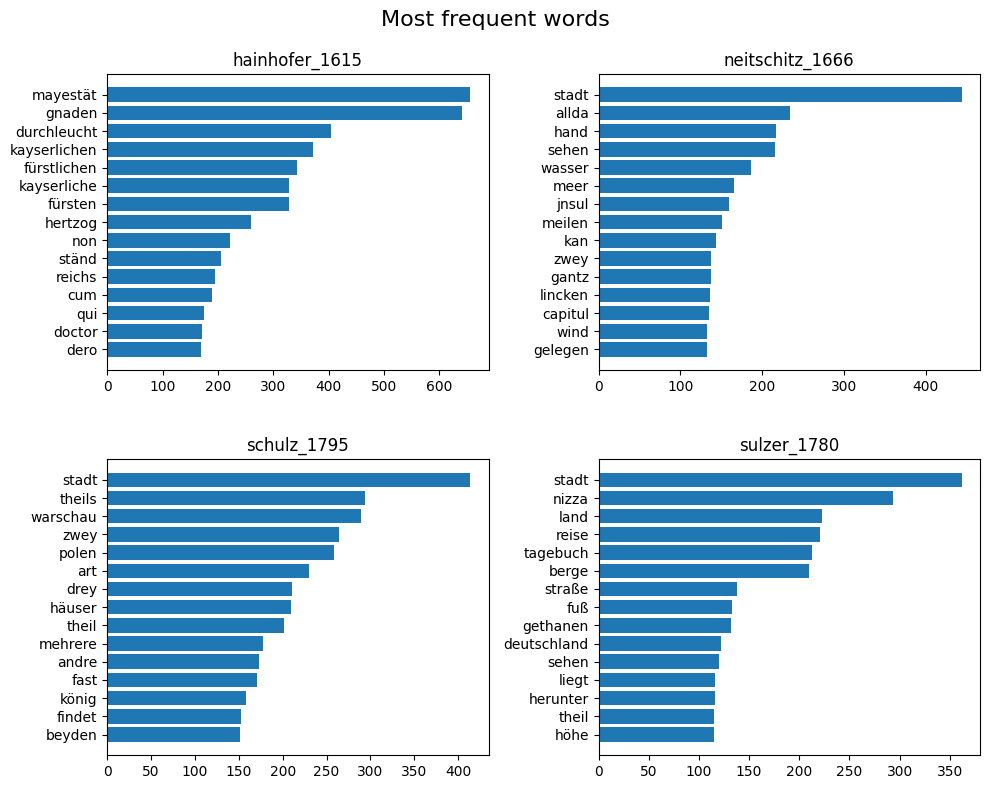

In [8]:
# plot data
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 8))
count = 0
for x in range(nrows):
    for y in range(ncols):
        try:
            df = sorted_frames[count]
            title = doc_names[count]
        except IndexError:
            break
        ax[x, y].barh(df.word, df.frequency)
        ax[x, y].set_title(title)
        count += 1
plt.suptitle('Most frequent words', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent overlap of the columns
plt.subplots_adjust(top=0.90, hspace=0.3) # reduce the space between columns and suptitle
plt.savefig(os.path.join(w_dir, 'figures', 'most_frequent_words_combined_corpus.png'))
plt.show()

Hier lassen sich bereits einige Tendenzen beobachten: Bei den gedruckten Reiseberichten sind Begriffe, die auf eine Beschreibung der Landschaft und der besuchten Ortschaften schliessen lassen, am häufigsten, während die häufigsten Begriffe in Hainhofers Textsammlung einen Fokus auf persönliche / diplomatische Beziehungen suggerieren. Weiter erkennt man, dass Neitschitz zur See gefahren ist. Schulz und Sulzer waren auf dem Landweg unterwegs, ersterer richtung Osten, letzterer richtung Süden. Mit dieser einfachen Methode (es werden hier lediglich absolute Worthäufigkeiten gegenübergestellt) lässt sich also bereits relativ viel herausholen, wenn die Stoppwort-Listen vorgängig sorgfältig austariert werden. 

### 2.4 Tf-idf-Werte des Korpus
In diesem Schritt wollen wir herausfinden, ob das Tf-idf-Mass einen (noch) klareren Eindruck darüber vermittelt, wie sich die Texte in ihrer Wortwahl genau unterscheiden. Die eigentümlichen Schreibweisen der handschriftlichen Texte (Hainhofer) würden mit dieser Methode überproportional ins Gewicht fallen; deshalb übergeben wir dem _tf-idf-vectorizer_ die gleiche Liste von Stopwörtern wie oben, damit diese bei der Analyse nicht berücksichtigt werden.

In [ ]:
from tf_idf_functions import get_tf_idf_tables

# this returns a dictionary with document names as keys, corresponding data frames as values:
korpus_tfidf = get_tf_idf_tables(text_collection=texts, doc_names=ids, to_dict=True, stop_words=stop_words)

# prepare data for plotting:
data_frames = list(korpus_tfidf.values())
doc_names = list(korpus_tfidf.keys())
sorted_frames = []
for df in data_frames:
    sorted_df = df.sort_values(by='tf_idf_score', ascending=False).head(15).sort_values(by='tf_idf_score')
    sorted_frames.append(sorted_df)

# plot data
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 8))
count = 0
for x in range(nrows):
    for y in range(ncols):
        try:
            df = sorted_frames[count]
            title = doc_names[count]
        except IndexError:
            break
        ax[x, y].barh(df.word, df.tf_idf_score)
        ax[x, y].set_title(title)
        count += 1
plt.suptitle('Tf-idf-scores for combined corpus', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent overlap of the columns
plt.subplots_adjust(top=0.90, hspace=0.3) #reduce the space between columns and suptitle
plt.savefig('figures/TF-IDF-scores_CC.png') # "CC" --> combined corpus
plt.show()

Der Eindruck ist ein Ähnlicher wie oben. Jedoch tauchen bei Schulz und Sulzer mehr Ortschaften auf, es liesse sich also bereits (spekulativ) eine Reiseroute nachzeichnen, ohne die Texte jemals gelesen zu haben. Bei Neitschitz hingegen sind die Wörter mit den höchsten Werten unspezifischer als bei der einfachen Quantifizierung. Dies lässt darauf schliessen, das dieser Text, der mehr als hundert Jahre älter ist als die anderen beiden gedruckten Texte, sich von der Wortwahl her doch recht stark von diesen unterscheidet. Auffällig sind die Begriffe "turcken" und "mohren" &#151; Neitschitz beschreibt hier die Begegnung mit "fremden Völkern", welche die anderen Autoren nicht machten.

### 3. Natural language processing (NLP) mit einem trainierten Sprachmodell
Wir verwenden das Python-package spaCy, Version 3.7.5 mit dem dem deutschen trainierten Sprachmodell 'de_core_news_lg':
> https://spacy.io/

> Honnibal, M., & Montani, I. (2017). spaCy 2: Natural language understanding with Bloom embeddings, convolutional neural networks and incremental parsing.

In [10]:
# in case one would like to start the analysis directly at this point,
# modules, stop words etc. can be imported here:
import os
import json
import pandas as pd
from word_count_functions import get_frequency_tables
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
import stopwordsiso

data_dir = os.path.join(os.getcwd(), 'data')
source_all = os.path.join(data_dir, 'korpus_all.csv')
korpus_df = pd.read_csv(source_all)
korpus_df.index = korpus_df.text_id

# load stop words from nltk:
stopwords_nltk = stopwords.words('german')
# load iso-stopwords (more thorough set):
stopwords_iso = list(stopwordsiso.stopwords('de'))
# load custom stop words:
with open(os.path.join(data_dir, 'stopwords_hainhofer_small.json')) as json_file:
    stopwords_hainhofer_small = json.load(json_file)
with open(os.path.join(data_dir, 'stopwords_hainhofer_large.json')) as json_file:
    stopwords_hainhofer_large = json.load(json_file)
with open(os.path.join(data_dir, 'stopwords_custom.json')) as json_file:
    stopwords_custom = json.load(json_file)
    
# combine stop word lists:
stop_words = [*stopwords_iso, *stopwords_hainhofer_small, *stopwords_custom]

In [11]:
# import module:
import spacy
# load language model:
nlp_de = spacy.load('de_core_news_lg')

# load text content:
text_hainhofer = korpus_df.loc['hainhofer_1615', 'text']
text_neitschitz = korpus_df.loc['neitschitz_1666', 'text']
text_schulz = korpus_df.loc['schulz_1795', 'text']
text_sulzer = korpus_df.loc['sulzer_1780', 'text']

ids = korpus_df.text_id.to_list()

# splitting hainhofer / schulz again because documents are to long:
hainhofer_pgs = text_hainhofer.split('\n')
schulz_pgs = text_schulz.split('\n')

# add documents to spaCy pipeline:
# this will take a while, since the texts are relatively long...
docs_hainhofer = [nlp_de(pg) for pg in hainhofer_pgs] 
doc_neitschitz = nlp_de(text_neitschitz)
docs_schulz = [nlp_de(pg) for pg in schulz_pgs]
doc_sulzer = nlp_de(text_sulzer)

### 3.1 Lemmatisierung
Die Wörter werden auf ihre Grundform reduziert. Wörter mit gleicher Bedeutung, die im Text in verschiedenen Formen vorkommen, werden so als ein 'type' gezählt und entsprechend höher gewichtet.

In [12]:
# collect lemmatized form of tokens in list:
lemmas_hainhofer = []
for doc in docs_hainhofer:
    lemmas = [token.lemma_ for token in doc]
    lemmas_hainhofer += lemmas
    
lemmas_neitschitz = [token.lemma_ for token in doc_neitschitz]

lemmas_schulz = []
for doc in docs_schulz:
    lemmas = [token.lemma_ for token in doc]
    lemmas_schulz += lemmas
    
lemmas_sulzer = [token.lemma_ for token in doc_sulzer]

# join lists, make sure to keep the right order! :
lemmas = [lemmas_hainhofer, lemmas_neitschitz, lemmas_schulz, lemmas_sulzer]

# pass collected lemmas to counting function, remove stopwords:
freq_lemma_dict = get_frequency_tables(text_collection=lemmas, doc_names=ids, 
                                       to_dict=True, from_tokens=True, stop_words=stop_words)

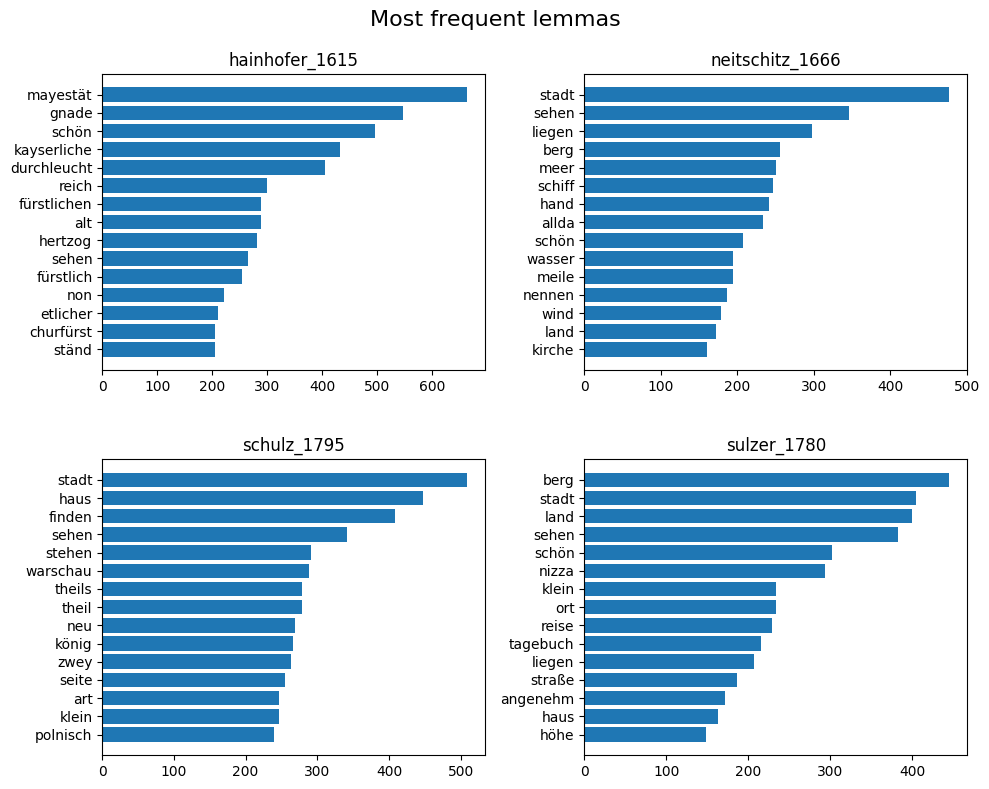

In [13]:
# plot results, save figure:
from plot_functions import prepare_plot

prepare_plot(freq_dict=freq_lemma_dict, 
             n_rows=2, 
             n_cols=2, 
             p_title='Most frequent lemmas', 
             f_path = 'figures/Most_frequent_lemmas_CC.png',
             save_figure=True)

### 3.2 Part-of-speech tagging (POS tagging)
Dies ermöglicht, die Texte nach Wortarten zu filtern und diese zu vergleichen.
- Vergleich von Nomen / Eigennamen

In [14]:
# get list of  lemmatized nouns and proper names per document:
nn_neitschitz = [t.lemma_ for t in doc_neitschitz if t.pos_ == 'NOUN' or t.pos_ == 'PROPN']
nn_sulzer = [t.lemma_ for t in doc_sulzer if t.pos_ == 'NOUN' or t.pos_ == 'PROPN']
nn_hainhofer = []
for doc in docs_hainhofer:
    nn = [t.lemma_ for t in doc if t.pos_ == 'NOUN' or t.pos_ == 'PROPN']
    nn_hainhofer += nn
nn_schulz = []
for doc in docs_schulz:
    nn = [t.lemma_ for t in doc if t.pos_ == 'NOUN' or t.pos_ == 'PROPN']
    nn_schulz += nn
    
# join lists, make sure to keep the right order! :
proper_nouns = [nn_hainhofer, nn_neitschitz, nn_schulz, nn_sulzer]

# get frequency tables, remove stop words:
freq_noun_dict = get_frequency_tables(text_collection=proper_nouns, doc_names=ids, 
                                      to_dict=True, from_tokens=True, stop_words=stop_words)

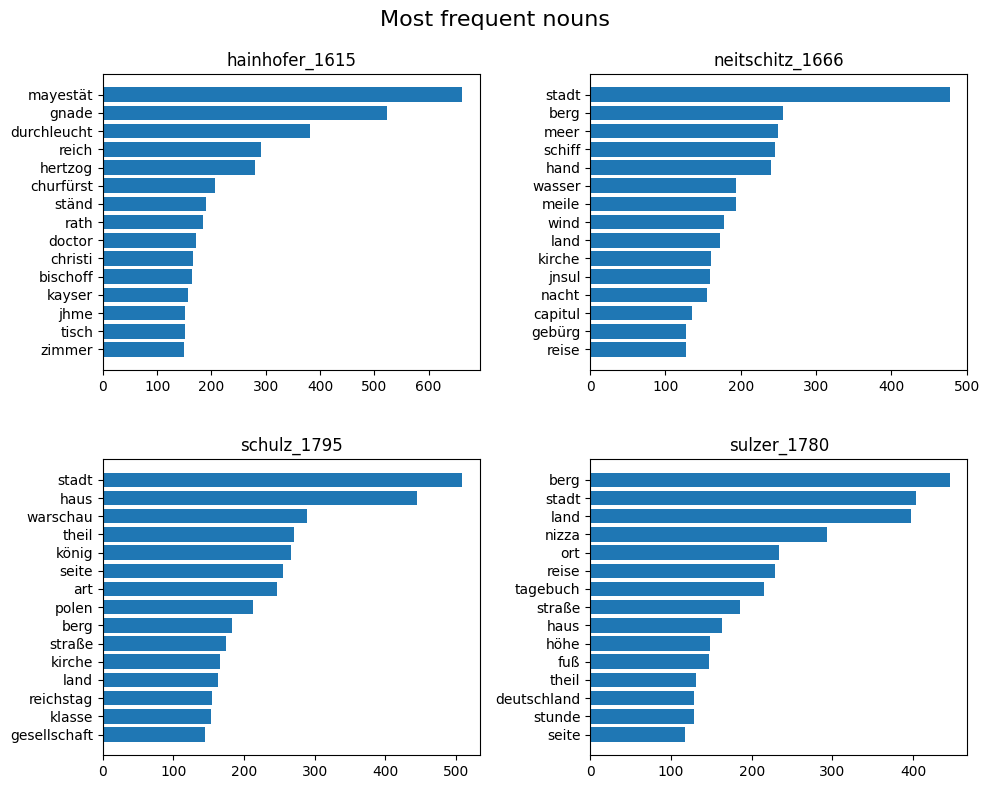

In [15]:
# plot results, save figure:
prepare_plot(freq_dict=freq_noun_dict, 
             n_rows=2, 
             n_cols=2, 
             p_title='Most frequent nouns',
             f_path = 'figures/Most_frequent_nouns_CC.png',
             save_figure=True)

- Vergleich der Adjektive:

In [16]:
# collect adjectives in list:
orig_adj_hainhofer = []
for doc in docs_hainhofer:
    adj = [token.text for token in doc if token.pos_ == 'ADJ']
    orig_adj_hainhofer += adj
    
orig_adj_neitschitz = [token.text for token in doc_neitschitz if token.pos_ == 'ADJ']

orig_adj_schulz = []
for doc in docs_schulz:
    adj = [str(token) for token in doc if token.pos_ == 'ADJ']
    orig_adj_schulz += adj
    
orig_adj_sulzer = [str(token) for token in doc_sulzer if token.pos_ == 'ADJ']

orig_adjectives = [orig_adj_hainhofer, orig_adj_neitschitz, orig_adj_schulz, orig_adj_sulzer]

# pass collected adjectives to counting function, remove stopwords:
orig_adj_dict = get_frequency_tables(text_collection=orig_adjectives, doc_names=ids, 
                                     to_dict=True, from_tokens=True, stop_words=stop_words)

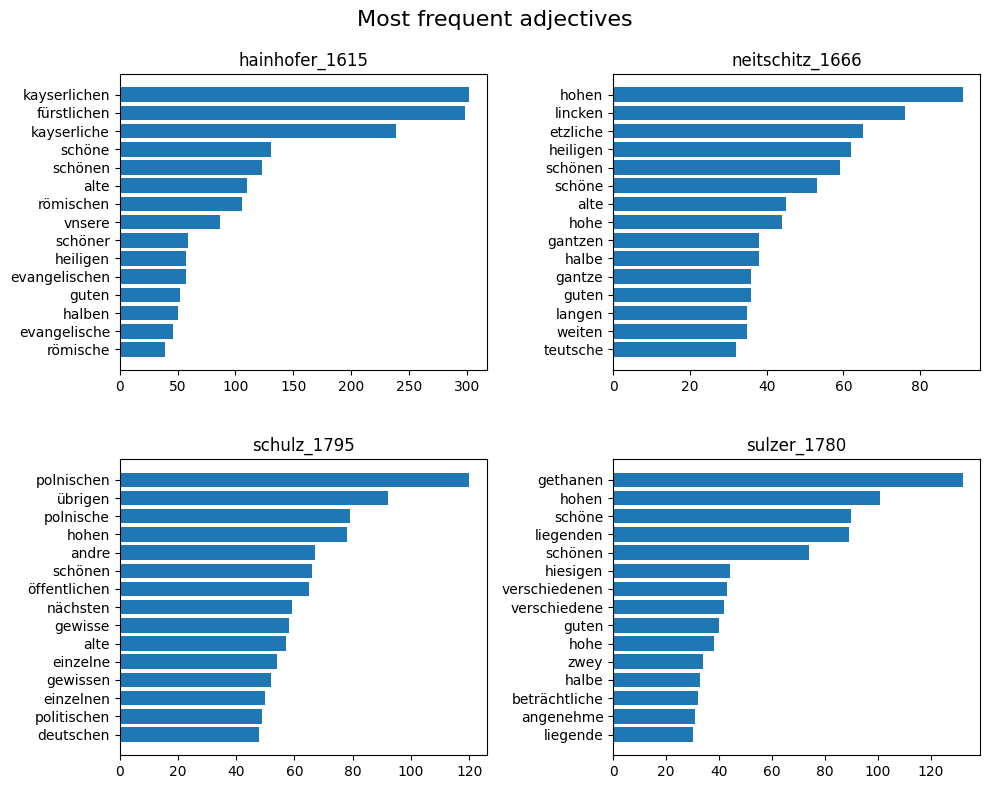

In [17]:
# plot results, save figure:
prepare_plot(freq_dict=orig_adj_dict, 
             n_rows=2, 
             n_cols=2, 
             p_title='Most frequent adjectives', 
             f_path = 'figures/Most_frequent_adjectives_CC.png',
             save_figure=True)

- Adjektive, lemmatisiert:

In [18]:
# collect adjectives in list:
lemma_adj_hainhofer = []
for doc in docs_hainhofer:
    l_adj = [token.lemma_ for token in doc if token.pos_ == 'ADJ']
    lemma_adj_hainhofer += l_adj
    
lemma_adj_neitschitz = [token.lemma_ for token in doc_neitschitz if token.pos_ == 'ADJ']

lemma_adj_schulz = []
for doc in docs_schulz:
    l_adj = [token.lemma_ for token in doc if token.pos_ == 'ADJ']
    lemma_adj_schulz += l_adj
    
lemma_adj_sulzer = [token.lemma_ for token in doc_sulzer if token.pos_ == 'ADJ']

lemma_adjectives = [lemma_adj_hainhofer, lemma_adj_neitschitz, lemma_adj_schulz, lemma_adj_sulzer]

# pass collected adjectives to counting function, remove stopwords:
lemma_adj_dict = get_frequency_tables(text_collection=lemma_adjectives, doc_names=ids, 
                                     to_dict=True, from_tokens=True, stop_words=stop_words)

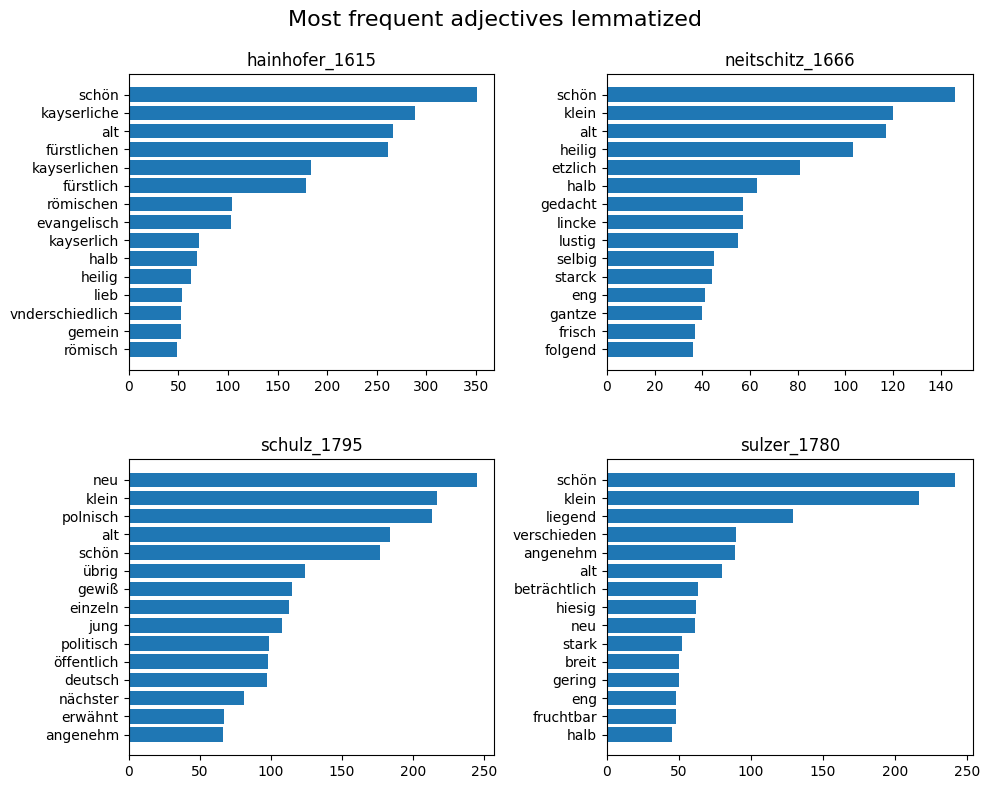

In [19]:
# plot results, save figure:
prepare_plot(freq_dict=lemma_adj_dict, 
             n_rows=2, 
             n_cols=2, 
             p_title='Most frequent adjectives lemmatized', 
             f_path = 'figures/Most_frequent_adjectives_CC_lemmatized.png',
             save_figure=True)

Die Analyse mit dem trainierten Sprachmodell von _spaCy_ bestätigt im Grunde obige Beobachtungen. Insbesondere bei den Substantiven lässt sich zeigen, dass sich die edierten Reiseberichte in der Wortwahl sehr ähnlich sind, insofern als 'geografische' bzw. 'reisespezifische' Begriffe am häufigsten auftauchen. Die Berichte von Hainhofer scheinen sich hingegen eher um politische Fragen und persönliche Beziehungen zu drehen. Vom Vergleich der Adjektive eine Aussage über die Texte herzuleiten, erscheint auf dieser Ebene eher schwierig; weshalb zum Beispiel 'schön' oder 'alt' in allen Texten so prominent vertreten sind, liesse sich wohl nur über eine tiefergehende qualitative Analyse ergründen. Die statististische Methode mit dem Tf-idf-Mass vermittelt jedoch einen klareren Eindruck davon, inwiefern sich die Texte spezifisch voneinander unterscheiden. Um sich einen ersten Überblick über ein (auch grösseres) Korpus zu verschaffen, scheint diese Methode geeignet zu sein, zumal sie auch weniger Rechenleistung benötigt als das trainierte Sprachmodell.

### 3.3 Similarity
#### SpaCy Similarity -  1. Original-Adjektive

In [20]:
# join list of adjectives to one string per text:
orig_adj_text_hainhofer = " ".join(orig_adj_hainhofer)
orig_adj_text_neitschitz = " ".join(orig_adj_neitschitz)
orig_adj_text_schulz = " ".join(orig_adj_schulz)
orig_adj_text_sulzer = " ".join(orig_adj_sulzer)

# pass to spaCy pipeline:
doc_orig_adj_hainhofer = nlp_de(orig_adj_text_hainhofer)
doc_orig_adj_neitschitz = nlp_de(orig_adj_text_neitschitz)
doc_orig_adj_schulz = nlp_de(orig_adj_text_schulz)
doc_orig_adj_sulzer = nlp_de(orig_adj_text_sulzer)

# calculate similarity values:
similarity_orig_adj_hainhofer_neitschitz = doc_orig_adj_hainhofer.similarity(doc_orig_adj_neitschitz)
similarity_orig_adj_hainhofer_schulz = doc_orig_adj_hainhofer.similarity(doc_orig_adj_schulz)
similarity_orig_adj_hainhofer_sulzer = doc_orig_adj_hainhofer.similarity(doc_orig_adj_sulzer)
similarity_orig_adj_neitschitz_schulz = doc_orig_adj_neitschitz.similarity(doc_orig_adj_schulz)
similarity_orig_adj_neitschitz_sulzer = doc_orig_adj_neitschitz.similarity(doc_orig_adj_sulzer)
similarity_orig_adj_schulz_sulzer = doc_orig_adj_schulz.similarity(doc_orig_adj_sulzer)

print("Adjektiv-Ähnlichkeit Hainhofer-Neitschitz:", similarity_orig_adj_hainhofer_neitschitz)
print("Adjektiv-Ähnlichkeit Hainhofer-Schulz:", similarity_orig_adj_hainhofer_schulz)
print("Adjektiv-Ähnlichkeit Hainhofer-Sulzer:", similarity_orig_adj_hainhofer_sulzer)
print("Adjektiv-Ähnlichkeit Neitschitz-Schulz:", similarity_orig_adj_neitschitz_schulz)
print("Adjektiv-Ähnlichkeit Neitschitz-Sulzer:", similarity_orig_adj_neitschitz_sulzer)
print("Adjektiv-Ähnlichkeit Schulz-Sulzer:", similarity_orig_adj_schulz_sulzer)

Adjektiv-Ähnlichkeit Hainhofer-Neitschitz: 0.9031179041807689
Adjektiv-Ähnlichkeit Hainhofer-Schulz: 0.8643475457874968
Adjektiv-Ähnlichkeit Hainhofer-Sulzer: 0.8236179625966454
Adjektiv-Ähnlichkeit Neitschitz-Schulz: 0.784280931708922
Adjektiv-Ähnlichkeit Neitschitz-Sulzer: 0.778094579370122
Adjektiv-Ähnlichkeit Schulz-Sulzer: 0.9745597839014225


#### SpaCy Similarity - 2. Lemmatisierte Adjektive

In [21]:
# join list of lemmatized adjectives to one string per text:
lemma_adj_text_hainhofer = " ".join(lemma_adj_hainhofer)
lemma_adj_text_neitschitz = " ".join(lemma_adj_neitschitz)
lemma_adj_text_schulz = " ".join(lemma_adj_schulz)
lemma_adj_text_sulzer = " ".join(lemma_adj_sulzer)

# pass to spaCy pipeline:
doc_lemma_adj_hainhofer = nlp_de(lemma_adj_text_hainhofer)
doc_lemma_adj_neitschitz = nlp_de(lemma_adj_text_neitschitz)
doc_lemma_adj_schulz = nlp_de(lemma_adj_text_schulz)
doc_lemma_adj_sulzer = nlp_de(lemma_adj_text_sulzer)

# calculate similarity values:
similarity_lemma_adj_hainhofer_neitschitz = doc_lemma_adj_hainhofer.similarity(doc_lemma_adj_neitschitz)
similarity_lemma_adj_hainhofer_schulz = doc_lemma_adj_hainhofer.similarity(doc_lemma_adj_schulz)
similarity_lemma_adj_hainhofer_sulzer = doc_lemma_adj_hainhofer.similarity(doc_lemma_adj_sulzer)
similarity_lemma_adj_neitschitz_schulz = doc_lemma_adj_neitschitz.similarity(doc_lemma_adj_schulz)
similarity_lemma_adj_neitschitz_sulzer = doc_lemma_adj_neitschitz.similarity(doc_lemma_adj_sulzer)
similarity_lemma_adj_schulz_sulzer = doc_lemma_adj_schulz.similarity(doc_lemma_adj_sulzer)

print("Adjektiv-Ähnlichkeit Hainhofer-Neitschitz:", similarity_lemma_adj_hainhofer_neitschitz)
print("Adjektiv-Ähnlichkeit Hainhofer-Schulz:", similarity_lemma_adj_hainhofer_schulz)
print("Adjektiv-Ähnlichkeit Hainhofer-Sulzer:", similarity_lemma_adj_hainhofer_sulzer)
print("Adjektiv-Ähnlichkeit Neitschitz-Schulz:", similarity_lemma_adj_neitschitz_schulz)
print("Adjektiv-Ähnlichkeit Neitschitz-Sulzer:", similarity_lemma_adj_neitschitz_sulzer)
print("Adjektiv-Ähnlichkeit Schulz-Sulzer:", similarity_lemma_adj_schulz_sulzer)

Adjektiv-Ähnlichkeit Hainhofer-Neitschitz: 0.8594613265313975
Adjektiv-Ähnlichkeit Hainhofer-Schulz: 0.8193814580191325
Adjektiv-Ähnlichkeit Hainhofer-Sulzer: 0.7773796160873017
Adjektiv-Ähnlichkeit Neitschitz-Schulz: 0.7753535084212136
Adjektiv-Ähnlichkeit Neitschitz-Sulzer: 0.768665688370404
Adjektiv-Ähnlichkeit Schulz-Sulzer: 0.9726177246387671


#### SpaCy Similarity - 3. Nomen

In [22]:
# join list of nouns to one string per text:
nn_text_hainhofer = " ".join(nn_hainhofer)
nn_text_neitschitz = " ".join(nn_neitschitz)
nn_text_schulz = " ".join(nn_schulz)
nn_text_sulzer = " ".join(nn_sulzer)

# pass to spaCy pipeline:
doc_nn_hainhofer = nlp_de(nn_text_hainhofer)
doc_nn_neitschitz = nlp_de(nn_text_neitschitz)
doc_nn_schulz = nlp_de(nn_text_schulz)
doc_nn_sulzer = nlp_de(nn_text_sulzer)

# calculate similarity values:
similarity_nn_hainhofer_neitschitz = doc_nn_hainhofer.similarity(doc_nn_neitschitz)
similarity_nn_hainhofer_schulz = doc_nn_hainhofer.similarity(doc_nn_schulz)
similarity_nn_hainhofer_sulzer = doc_nn_hainhofer.similarity(doc_nn_sulzer)
similarity_nn_neitschitz_schulz = doc_nn_neitschitz.similarity(doc_nn_schulz)
similarity_nn_neitschitz_sulzer = doc_nn_neitschitz.similarity(doc_nn_sulzer)
similarity_nn_schulz_sulzer = doc_nn_schulz.similarity(doc_nn_sulzer)

print("Nomen-Ähnlichkeit Hainhofer-Neitschitz:", similarity_nn_hainhofer_neitschitz)
print("Nomen-Ähnlichkeit Hainhofer-Schulz:", similarity_nn_hainhofer_schulz)
print("Nomen-Ähnlichkeit Hainhofer-Sulzer:", similarity_nn_hainhofer_sulzer)
print("Nomen-Ähnlichkeit Neitschitz-Schulz:", similarity_nn_neitschitz_schulz)
print("Nomen-Ähnlichkeit Neitschitz-Sulzer:", similarity_nn_neitschitz_sulzer)
print("Nomen-Ähnlichkeit Schulz-Sulzer:", similarity_nn_schulz_sulzer)

Nomen-Ähnlichkeit Hainhofer-Neitschitz: 0.7379270597131838
Nomen-Ähnlichkeit Hainhofer-Schulz: 0.6870056215452764
Nomen-Ähnlichkeit Hainhofer-Sulzer: 0.6228930552607084
Nomen-Ähnlichkeit Neitschitz-Schulz: 0.9126588700822326
Nomen-Ähnlichkeit Neitschitz-Sulzer: 0.9472613381476401
Nomen-Ähnlichkeit Schulz-Sulzer: 0.942134253413636


#### Visualisierung der Ähnlichkeit von Adjektiven -  1. Original-Adjektive

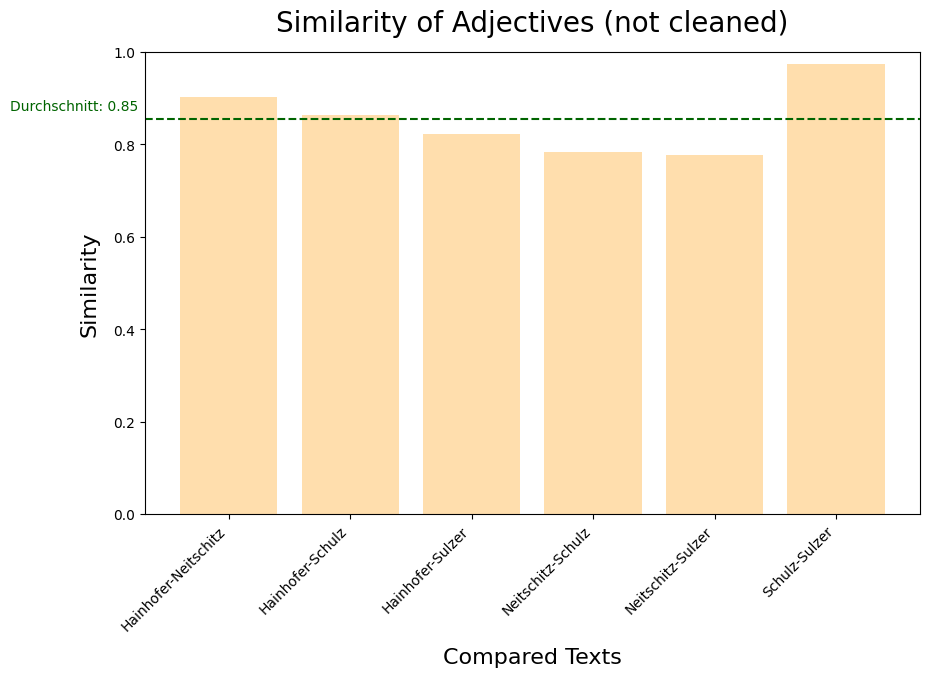

In [23]:
# data for column chart:
labels = [
    "Hainhofer-Neitschitz",
    "Hainhofer-Schulz",
    "Hainhofer-Sulzer",
    "Neitschitz-Schulz",
    "Neitschitz-Sulzer",
    "Schulz-Sulzer"
]

similarities_orig_adj = [
    similarity_orig_adj_hainhofer_neitschitz,
    similarity_orig_adj_hainhofer_schulz,
    similarity_orig_adj_hainhofer_sulzer,
    similarity_orig_adj_neitschitz_schulz,
    similarity_orig_adj_neitschitz_sulzer,
    similarity_orig_adj_schulz_sulzer
]

# plot column chart:
plt.figure(figsize=(10, 6))
plt.bar(labels, similarities_orig_adj, color='navajowhite')
plt.xlabel('Compared Texts', fontsize=16, labelpad=10)
plt.ylabel('Similarity', fontsize=16, labelpad=10)
plt.title('Similarity of Adjectives (not cleaned)', fontsize=20, pad=15)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# adding a reference line
## calculate average of similarity values:
avg_similarity = sum(similarities_orig_adj) / len(similarities_orig_adj)

## plot reference line to chart:
plt.axhline(y=avg_similarity, color='darkgreen', linestyle='--')
plt.text(-1.8, avg_similarity + 0.02, f'Durchschnitt: {avg_similarity:.2f}', color='darkgreen')

# show results, save figure:
plt.savefig('Figures/Similarity_orig_adjectives.png')
plt.show()

#### Visualisierung der Ähnlichkeit von Adjektiven -  2. Adjektive lemmatisiert

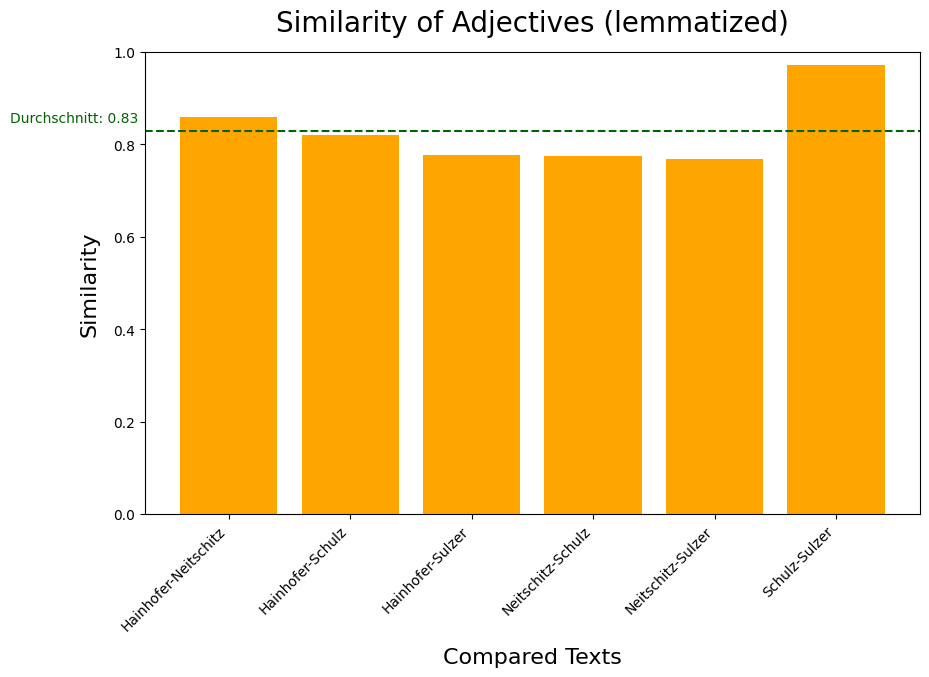

In [24]:
# data for column chart:
similarities_lemma_adj = [
    similarity_lemma_adj_hainhofer_neitschitz,
    similarity_lemma_adj_hainhofer_schulz,
    similarity_lemma_adj_hainhofer_sulzer,
    similarity_lemma_adj_neitschitz_schulz,
    similarity_lemma_adj_neitschitz_sulzer,
    similarity_lemma_adj_schulz_sulzer
]

# plot column chart:
plt.figure(figsize=(10, 6))
plt.bar(labels, similarities_lemma_adj, color='orange')
plt.xlabel('Compared Texts', fontsize=16, labelpad=10)
plt.ylabel('Similarity', fontsize=16, labelpad=10)
plt.title('Similarity of Adjectives (lemmatized)', fontsize=20, pad=15)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)


# adding a reference line
## calculate average of similarity values:
avg_similarity = sum(similarities_lemma_adj) / len(similarities_lemma_adj)

## plot reference line to chart:
plt.axhline(y=avg_similarity, color='darkgreen', linestyle='--')
plt.text(-1.8, avg_similarity + 0.02, f'Durchschnitt: {avg_similarity:.2f}', color='darkgreen')

# show results, save figure:
plt.savefig('Figures/Similarity_lemma_adjectives.png')
plt.show()

#### Visualisierung der Ähnlichkeit von Nomen

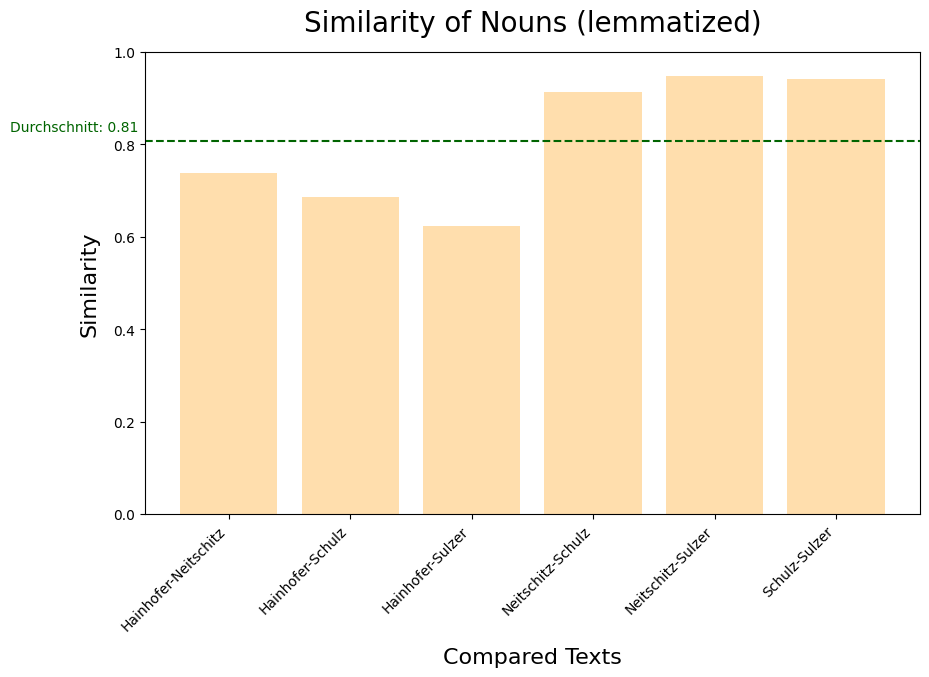

In [25]:
# data for column chart:
similarities_nn = [
    similarity_nn_hainhofer_neitschitz,
    similarity_nn_hainhofer_schulz,
    similarity_nn_hainhofer_sulzer,
    similarity_nn_neitschitz_schulz,
    similarity_nn_neitschitz_sulzer,
    similarity_nn_schulz_sulzer
]

# plot column chart:
plt.figure(figsize=(10, 6))
plt.bar(labels, similarities_nn, color='navajowhite')
plt.xlabel('Compared Texts', fontsize=16, labelpad=10)
plt.ylabel('Similarity', fontsize=16, labelpad=10)
plt.title('Similarity of Nouns (lemmatized)', fontsize=20, pad=15)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# adding a reference line
## calculate average of similarity values:
avg_similarity = sum(similarities_nn) / len(similarities_nn)

## plot reference line to chart:
plt.axhline(y=avg_similarity, color='darkgreen', linestyle='--')
plt.text(-1.8, avg_similarity + 0.02, f'Durchschnitt: {avg_similarity:.2f}', color='darkgreen')

# show results, save figure:
plt.savefig('Figures/Similarity_nouns.png')
plt.show()

### Similarity-Werte für die ganzen Texte

In [26]:
def check_similarity(doc_1, doc_2):
    if isinstance(doc_1, list) and isinstance(doc_2, list):
        s_values = []
        for x in doc_1:
            for y in doc_2:
                s_value = x.similarity(y)
                s_values.append(s_value)
        s_value = sum(s_values) / len(s_values)
    elif isinstance(doc_1, list) and not isinstance(doc_2, list):          
        s_values = [doc.similarity(doc_2) for doc in doc_1]
        s_value = sum(s_values) / len(s_values)
    elif isinstance(doc_2, list) and not isinstance(doc_1, list):
        s_values = [doc_1.similarity(doc) for doc in doc_2]
        s_value = sum(s_values) / len(s_values)
    else:
        s_value = doc_1.similarity(doc_2)
    return s_value

In [27]:
similarity_hainhofer_neitschitz = check_similarity(docs_hainhofer, doc_neitschitz)
similarity_hainhofer_schulz = check_similarity(docs_hainhofer, docs_schulz)
similarity_hainhofer_sulzer = check_similarity(docs_hainhofer, doc_sulzer)
similarity_neitschitz_schulz = check_similarity(doc_neitschitz, docs_schulz)
similarity_neitschitz_sulzer = check_similarity(doc_neitschitz, doc_sulzer)
similarity_schulz_sulzer = check_similarity(docs_schulz, doc_sulzer)

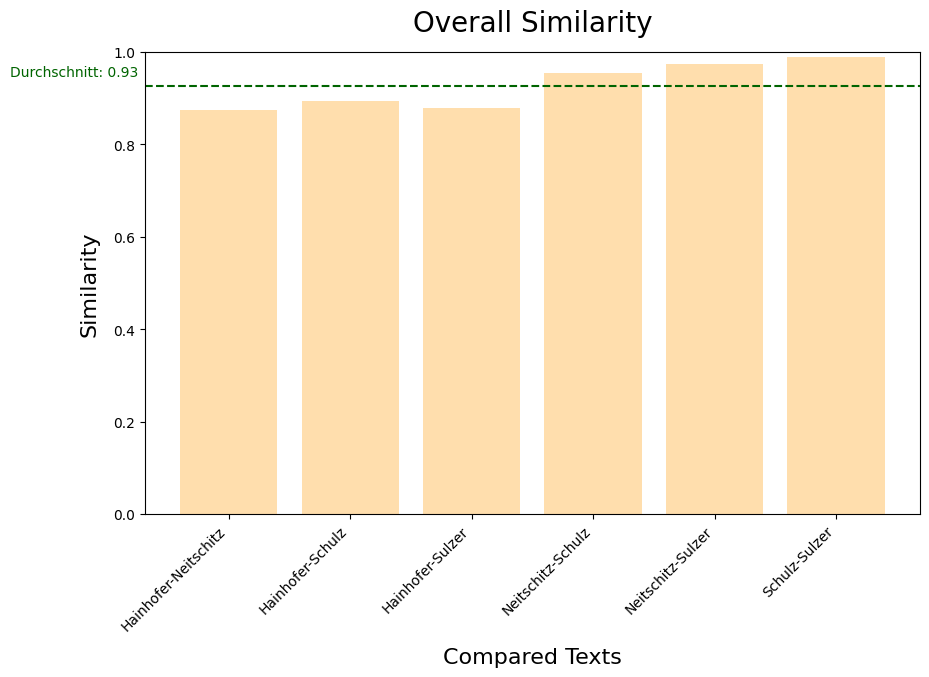

In [28]:
# data for column chart:
similarities = [
    similarity_hainhofer_neitschitz,
    similarity_hainhofer_schulz,
    similarity_hainhofer_sulzer,
    similarity_neitschitz_schulz,
    similarity_neitschitz_sulzer,
    similarity_schulz_sulzer
]

# plot column chart:
plt.figure(figsize=(10, 6))
plt.bar(labels, similarities, color='navajowhite')
plt.xlabel('Compared Texts', fontsize=16, labelpad=10)
plt.ylabel('Similarity', fontsize=16, labelpad=10)
plt.title('Overall Similarity', fontsize=20, pad=15)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# adding a reference line
## calculate average of similarity values:
avg_similarity = sum(similarities) / len(similarities)

## plot reference line to chart:
plt.axhline(y=avg_similarity, color='darkgreen', linestyle='--')
plt.text(-1.8, avg_similarity + 0.02, f'Durchschnitt: {avg_similarity:.2f}', color='darkgreen')

# show results, save figure:
plt.savefig('Figures/Similarity_total.png')
plt.show()